In [49]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np

In [54]:
xmin = ymin = -1
xmax = ymax = 1

# 2d Point
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __add__(self, point):
        return Point(self.x + point.x, self.y + point.y)
    
    def __sub__(self, point):
        return Point(self.x - point.x, self.y - point.y)
    
    def __rmul__(self, other):
        return Point(self.x * other, self.y * other)
    
class Human :
    def __init__(self, location, speed, race, bias):
        self.location = location
        self.travelSpeed = speed
        self.race = race
        # bias against another race
        self.bias = bias
        
    def move(self):
        vx = np.random.uniform(-1, 1)
        vy = np.random.uniform(-1, 1)
        v = Point(vx, vy)
        self.location = self.location + self.travelSpeed * v

class Population :
    def __init__(self, numMembers, race, biasMean, biasVariance):
        self.race = race
        self.mean = biasMean
        self.variance = biasVariance
        self.members = []
        biases = np.random.normal(self.mean, self.variance, numMembers)
        for i in range(numMembers):
            rx = np.random.uniform(xmin, xmax)
            ry = np.random.uniform(ymin, ymax)
            member = Human(Point(rx, ry), 0.01, race, biases[i])
            self.members.append(member)
            
    def reEvaluateBias(self):
        values = [x.bias for x in self.members]
        self.mean = np.mean(values)
        self.variance = np.std(values, ddof=1)
        
    def count(self):
        return len(self.members)
    
    def move(self):
        for m in self.members:
            m.move()
    
# Simulation is carried out by evaluating 'meetings', where 2 or more Humans meet.
# Race A and Race B
# bias_A_i = bA_i
# average_group_bias_A = bA^
# average_group_bias_AB = bAB^


# Situation 0
# if group A = 1 member meets group B = 1 member
# bA_1 = bB_1 = bAB^

# Situation 1
# if group A = 1 member meets group B = n members
# if bB^ > mu + 3 * sigma, group A is eliminated
# if bB^ < mu - 3 * sigma, bA_1 /= n
# all other cases bA_1 += (bB^ - bA^)

# Situation 2
# if group A = n members meets group B = m members
# WLOG if bA^ < bB^
# bA_i += (bB^ - bA^)
# bB_i -= (bB^ - bA^)

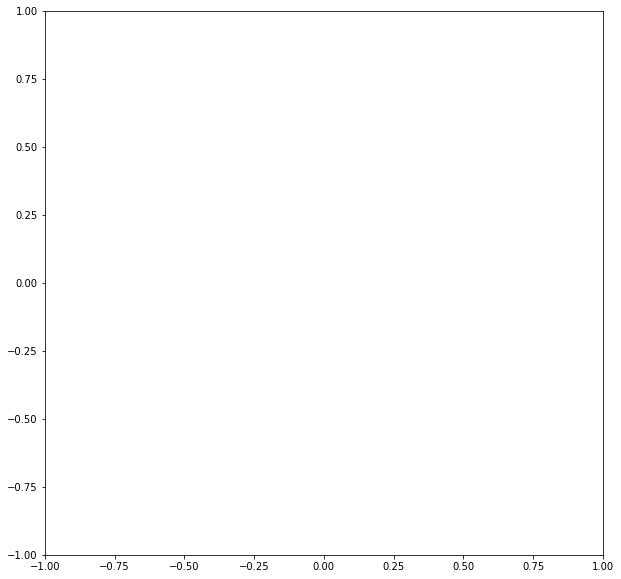

In [55]:

####
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
membersA, = ax.plot([],[], 'ro', markersize=10)
membersB, = ax.plot([],[], 'go', markersize=10)


In [56]:
raceA = Population(100, 'Morlocks', 0, 0.5)
raceB = Population(100, 'Elves', 0, 0.5)

def runSim(time):
    posA = [m.location for m in raceA.members]
    membersA.set_data([m.x for m in posA], [m.y for m in posA])
    posB = [m.location for m in raceB.members]
    membersB.set_data([m.x for m in posB], [m.y for m in posB])
    
    # move the population
    raceA.move()
    raceB.move()

In [57]:
iterations = 50
ani = anim.FuncAnimation(fig, runSim, frames=iterations)

from IPython.display import HTML
HTML(ani.to_jshtml())